### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

import seaborn as sns

1) Calculate correlations between amoc and the following transports:

    They are extracted here: [mep22dku@c0004 ~/scratch/AMOC-PLANKTOM/extraction-scripts]$ python syst-transports.py



    [] total net northward water, NO3, DIC from climate-varying co2-constant run (RVD0) (row 73-110)
        - annual
            - years 1950-2020
            - years 1980-2020
        - monthly
            - years 1950-2020
            - years 1980-2020

    2) Calculate correlation between amoc and net Fnat-ss (RVD0-RVB0)

In [4]:
sn = '/gpfs/home/mep22dku/scratch/AMOC-PLANKTOM/transports/'
RVD0_net_DIC_1950_m = pd.read_csv(f'{sn}RVD0-net-DIC-transport-vs-AMOC-1950-2020-monthly.csv', index_col='Depth')
RVD0_net_DIC_1950_a =pd.read_csv(f'{sn}RVD0-net-DIC-transport-vs-AMOC-1950-2020-annual.csv', index_col='Depth')

RVD0_net_water_1950_m =pd.read_csv(f'{sn}RVD0-net-water-transport-vs-AMOC-1950-2020-monthly.csv', index_col='Depth')
RVD0_net_water_1950_a = pd.read_csv(f'{sn}RVD0-net-water-transport-vs-AMOC-1950-2020-annual.csv', index_col='Depth')

RVD0_net_NO3_1950_m = pd.read_csv(f'{sn}RVD0-net-NO3-transport-vs-AMOC-1950-2020-monthly.csv', index_col='Depth')
RVD0_net_NO3_1950_a = pd.read_csv(f'{sn}RVD0-net-NO3-transport-vs-AMOC-1950-2020-annual.csv', index_col='Depth')

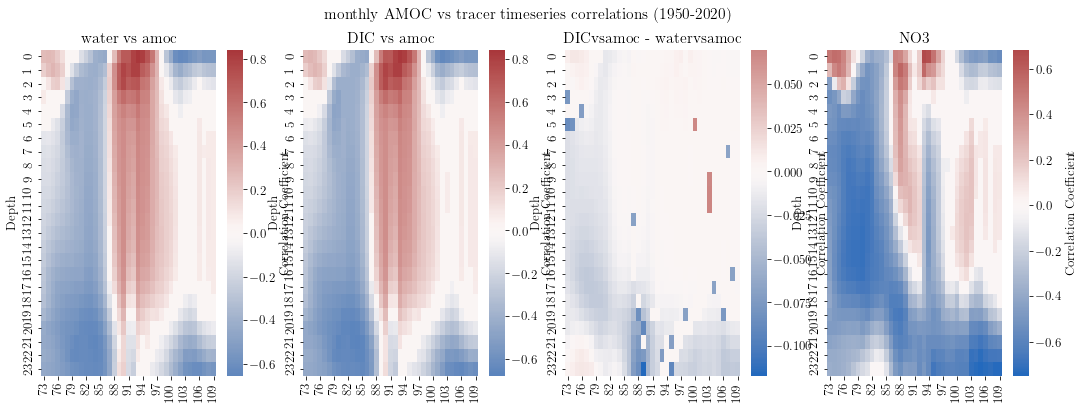

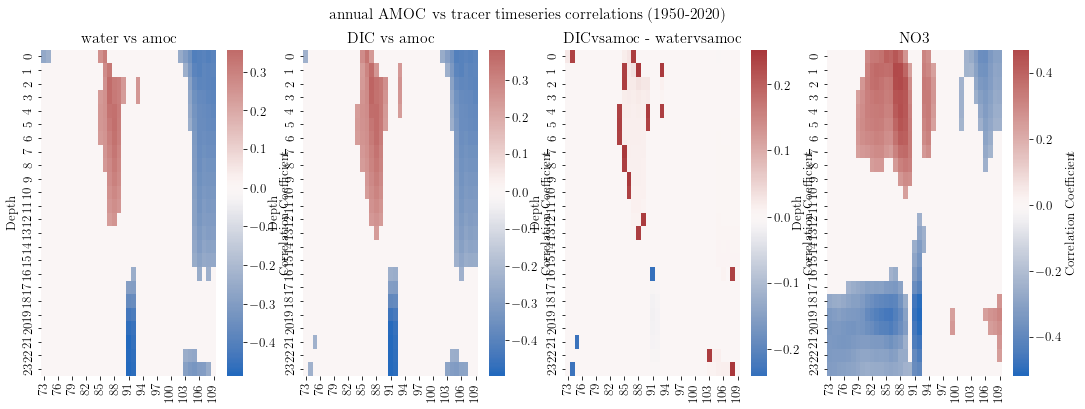

In [5]:
sn = '/gpfs/home/mep22dku/scratch/AMOC-PLANKTOM/transports/'
RVD0_net_DIC_m = pd.read_csv(f'{sn}RVD0-net-DIC-transport-vs-AMOC-1950-2020-monthly.csv', index_col='Depth')
RVD0_net_DIC_a =pd.read_csv(f'{sn}RVD0-net-DIC-transport-vs-AMOC-1950-2020-annual.csv', index_col='Depth')

RVD0_net_water_m =pd.read_csv(f'{sn}RVD0-net-water-transport-vs-AMOC-1950-2020-monthly.csv', index_col='Depth')
RVD0_net_water_a = pd.read_csv(f'{sn}RVD0-net-water-transport-vs-AMOC-1950-2020-annual.csv', index_col='Depth')

RVD0_net_NO3_m = pd.read_csv(f'{sn}RVD0-net-NO3-transport-vs-AMOC-1950-2020-monthly.csv', index_col='Depth')
RVD0_net_NO3_a = pd.read_csv(f'{sn}RVD0-net-NO3-transport-vs-AMOC-1950-2020-annual.csv', index_col='Depth')

fact = 1.5
fig, axs = plt.subplots(1,4, figsize=(12*fact, 4*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


sns.heatmap(RVD0_net_water_m, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[0])

sns.heatmap(RVD0_net_DIC_m, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[1])

sns.heatmap(RVD0_net_DIC_m-RVD0_net_water_m, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[2])

sns.heatmap(RVD0_net_NO3_m, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[3])

tits = ['water vs amoc', 'DIC vs amoc', 'DICvsamoc - watervsamoc']
plt.suptitle('monthly AMOC vs tracer timeseries correlations (1950-2020)')
tits = ['water vs amoc', 'DIC vs amoc', 'DICvsamoc - watervsamoc', 'NO3']

for i in range(0,4):
    axs[i].set_title(tits[i])

    
### annual
    
fact = 1.5
fig, axs = plt.subplots(1,4, figsize=(12*fact, 4*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


sns.heatmap(RVD0_net_water_a, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[0])

sns.heatmap(RVD0_net_DIC_a, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[1])

sns.heatmap(RVD0_net_DIC_a-RVD0_net_water_a, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[2])

sns.heatmap(RVD0_net_NO3_a, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[3])

plt.suptitle('annual AMOC vs tracer timeseries correlations (1950-2020)')
tits = ['water vs amoc', 'DIC vs amoc', 'DICvsamoc - watervsamoc', 'NO3']

for i in range(0,4):
    axs[i].set_title(tits[i])

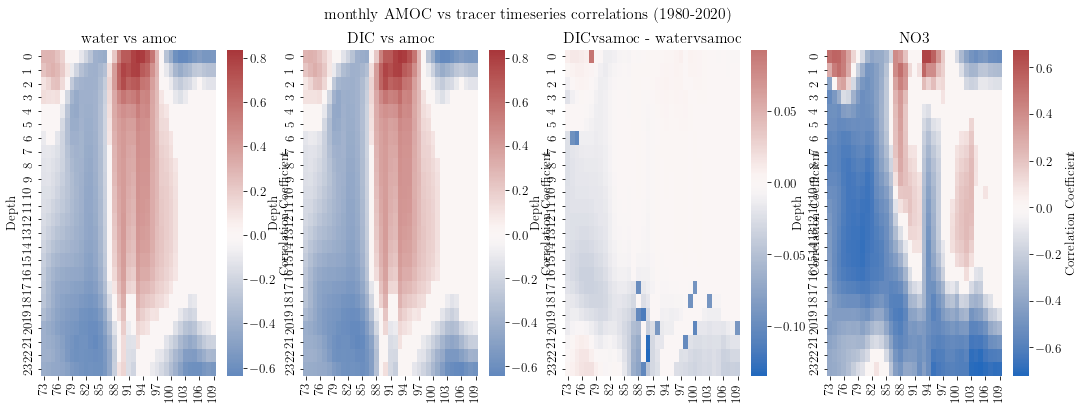

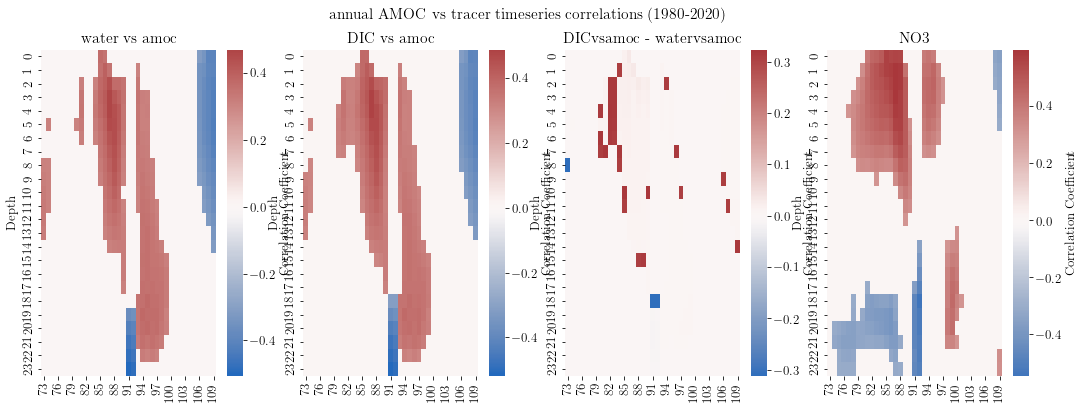

In [6]:
sn = '/gpfs/home/mep22dku/scratch/AMOC-PLANKTOM/transports/'
RVD0_net_DIC_m = pd.read_csv(f'{sn}RVD0-net-DIC-transport-vs-AMOC-1980-2020-monthly.csv', index_col='Depth')
RVD0_net_DIC_a =pd.read_csv(f'{sn}RVD0-net-DIC-transport-vs-AMOC-1980-2020-annual.csv', index_col='Depth')

RVD0_net_water_m =pd.read_csv(f'{sn}RVD0-net-water-transport-vs-AMOC-1980-2020-monthly.csv', index_col='Depth')
RVD0_net_water_a = pd.read_csv(f'{sn}RVD0-net-water-transport-vs-AMOC-1980-2020-annual.csv', index_col='Depth')

RVD0_net_NO3_m = pd.read_csv(f'{sn}RVD0-net-NO3-transport-vs-AMOC-1980-2020-monthly.csv', index_col='Depth')
RVD0_net_NO3_a = pd.read_csv(f'{sn}RVD0-net-NO3-transport-vs-AMOC-1980-2020-annual.csv', index_col='Depth')

fact = 1.5
fig, axs = plt.subplots(1,4, figsize=(12*fact, 4*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


sns.heatmap(RVD0_net_water_m, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[0])

sns.heatmap(RVD0_net_DIC_m, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[1])

sns.heatmap(RVD0_net_DIC_m-RVD0_net_water_m, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[2])

sns.heatmap(RVD0_net_NO3_m, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[3])

tits = ['water vs amoc', 'DIC vs amoc', 'DICvsamoc - watervsamoc']
plt.suptitle('monthly AMOC vs tracer timeseries correlations (1980-2020)')
tits = ['water vs amoc', 'DIC vs amoc', 'DICvsamoc - watervsamoc', 'NO3']

for i in range(0,4):
    axs[i].set_title(tits[i])

    
### annual
    
fact = 1.5
fig, axs = plt.subplots(1,4, figsize=(12*fact, 4*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


sns.heatmap(RVD0_net_water_a, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[0])

sns.heatmap(RVD0_net_DIC_a, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[1])

sns.heatmap(RVD0_net_DIC_a-RVD0_net_water_a, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[2])

sns.heatmap(RVD0_net_NO3_a, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[3])

plt.suptitle('annual AMOC vs tracer timeseries correlations (1980-2020)')
tits = ['water vs amoc', 'DIC vs amoc', 'DICvsamoc - watervsamoc', 'NO3']

for i in range(0,4):
    axs[i].set_title(tits[i])

IndexError: index 2 is out of bounds for axis 0 with size 2

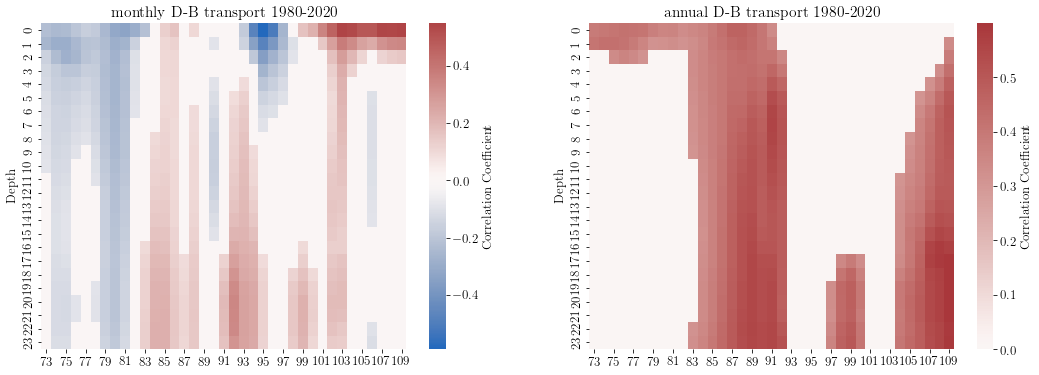

In [7]:
RVD0_net_DIC_m = pd.read_csv(f'{sn}FNAT-RVD0-RVB0-net-DIC-transport-vs-AMOC-1980-2020-monthly.csv', index_col='Depth')
RVD0_net_DIC_a = pd.read_csv(f'{sn}FNAT-RVD0-RVB0-net-DIC-transport-vs-AMOC-1980-2020-annual.csv', index_col='Depth')

fig, axs = plt.subplots(1,2, figsize=(12*fact, 4*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


sns.heatmap(RVD0_net_DIC_m, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[0])
sns.heatmap(RVD0_net_DIC_a, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[1])

tits = ['monthly D-B transport 1980-2020', 'annual D-B transport 1980-2020']
for i in range(0,4):
    axs[i].set_title(tits[i])

In [ ]:
RVD0_net_DIC_m = pd.read_csv(f'{sn}FNAT-RVD0-RVB0-net-DIC-transport-vs-AMOC-1950-2020-monthly.csv', index_col='Depth')
RVD0_net_DIC_a = pd.read_csv(f'{sn}FNAT-RVD0-RVB0-net-DIC-transport-vs-AMOC-1950-2020-annual.csv', index_col='Depth')

fig, axs = plt.subplots(1,2, figsize=(12*fact, 4*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


sns.heatmap(RVD0_net_DIC_m, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[0])
sns.heatmap(RVD0_net_DIC_a, annot=False, cmap='vlag', center=0, \
            cbar_kws={'label': 'Correlation Coefficient'}, ax = axs[1])

tits = ['monthly D-B transport 1950-2020', 'annual D-B transport 1950-2020']
for i in range(0,2):
    axs[i].set_title(tits[i])

# Transport hovmoller